In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns


# apply style to all the charts
sns.set_style('whitegrid')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.externals import joblib

# sklearn :: models

# sklearn :: evaluation metrics
from sklearn.metrics import cohen_kappa_score

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the data

In [2]:

df = pd.read_csv('/home/khalil/Desktop/power_consumption/data/modeling/power_consumption_daily.csv')
df.head(10)

,Date_Time,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy,dow,trend,seasonal,resid
0,2006-12-16,1209.18,34.92,93552.53,5180.80,0.00,546.00,4926.00,14680.93,5,nan,133.14,nan
1,2006-12-17,3390.46,226.01,345725.32,14398.60,2033.00,4187.00,13341.00,36946.67,6,nan,104.93,nan
2,2006-12-18,2203.83,161.79,347373.64,9247.20,1063.00,2621.00,14018.00,19028.43,0,nan,-93.56,nan
3,2006-12-19,1666.19,150.94,348479.01,7094.00,839.00,7602.00,6197.00,13131.90,1,2108.58,-12.01,-430.38
4,2006-12-20,2225.75,161.00,348923.61,9313.00,0.00,2648.00,14063.00,20384.80,2,2617.75,-8.96,-383.04
5,2006-12-21,1723.29,144.43,347096.41,7266.40,1765.00,2692.00,10456.00,13808.47,3,2497.68,-85.26,-689.14
6,2006-12-22,2341.34,186.91,347305.75,9897.00,3151.00,350.00,11131.00,24390.30,4,2574.73,-38.30,-195.09
7,2006-12-23,4773.39,221.47,345795.95,20200.40,2669.00,425.00,14726.00,61736.43,5,2898.71,133.14,1741.53
8,2006-12-24,2550.01,149.90,348029.91,11002.20,1703.00,5082.00,6891.00,28824.20,6,2799.14,104.93,-354.07
9,2006-12-25,2743.12,240.28,350495.90,11450.20,6620.00,1962.00,5795.00,31341.67,0,2849.05,-93.56,-12.38


In [3]:
# set the datetime column as the index
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.set_index('Date_Time', inplace=True)
df.head(10)

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy,dow,trend,seasonal,resid
Date_Time,,,,,,,,,,,,
2006-12-16,1209.18,34.92,93552.53,5180.80,0.00,546.00,4926.00,14680.93,5,nan,133.14,nan
2006-12-17,3390.46,226.01,345725.32,14398.60,2033.00,4187.00,13341.00,36946.67,6,nan,104.93,nan
2006-12-18,2203.83,161.79,347373.64,9247.20,1063.00,2621.00,14018.00,19028.43,0,nan,-93.56,nan
2006-12-19,1666.19,150.94,348479.01,7094.00,839.00,7602.00,6197.00,13131.90,1,2108.58,-12.01,-430.38
2006-12-20,2225.75,161.00,348923.61,9313.00,0.00,2648.00,14063.00,20384.80,2,2617.75,-8.96,-383.04
2006-12-21,1723.29,144.43,347096.41,7266.40,1765.00,2692.00,10456.00,13808.47,3,2497.68,-85.26,-689.14
2006-12-22,2341.34,186.91,347305.75,9897.00,3151.00,350.00,11131.00,24390.30,4,2574.73,-38.30,-195.09
2006-12-23,4773.39,221.47,345795.95,20200.40,2669.00,425.00,14726.00,61736.43,5,2898.71,133.14,1741.53
2006-12-24,2550.01,149.90,348029.91,11002.20,1703.00,5082.00,6891.00,28824.20,6,2799.14,104.93,-354.07


# Machine Learning approach

# Problem definition
Predict the house power consumption for tomorrow

# Feature Engineering

In [4]:
df['dow'] = df.index.dayofweek
df.head()

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy,dow,trend,seasonal,resid
Date_Time,,,,,,,,,,,,
2006-12-16,1209.18,34.92,93552.53,5180.80,0.00,546.00,4926.00,14680.93,5,nan,133.14,nan
2006-12-17,3390.46,226.01,345725.32,14398.60,2033.00,4187.00,13341.00,36946.67,6,nan,104.93,nan
2006-12-18,2203.83,161.79,347373.64,9247.20,1063.00,2621.00,14018.00,19028.43,0,nan,-93.56,nan
2006-12-19,1666.19,150.94,348479.01,7094.00,839.00,7602.00,6197.00,13131.90,1,2108.58,-12.01,-430.38
2006-12-20,2225.75,161.00,348923.61,9313.00,0.00,2648.00,14063.00,20384.80,2,2617.75,-8.96,-383.04


In [5]:
df_active_p = df[['active_power', 'dow']]
for i in range(1, 8):
    df_active_p['shift_'+str(i)] = df_active_p['active_power'].shift(i)
    df_active_p['dow_'+str(i)] = df_active_p['active_power'].shift(i)
df_active_p

/home/khalil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/khalil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,active_power,dow,shift_1,dow_1,shift_2,dow_2,shift_3,dow_3,shift_4,dow_4,shift_5,dow_5,shift_6,dow_6,shift_7,dow_7
Date_Time,,,,,,,,,,,,,,,,
2006-12-16,1209.18,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2006-12-17,3390.46,6,1209.18,1209.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2006-12-18,2203.83,0,3390.46,3390.46,1209.18,1209.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2006-12-19,1666.19,1,2203.83,2203.83,3390.46,3390.46,1209.18,1209.18,nan,nan,nan,nan,nan,nan,nan,nan
2006-12-20,2225.75,2,1666.19,1666.19,2203.83,2203.83,3390.46,3390.46,1209.18,1209.18,nan,nan,nan,nan,nan,nan
2006-12-21,1723.29,3,2225.75,2225.75,1666.19,1666.19,2203.83,2203.83,3390.46,3390.46,1209.18,1209.18,nan,nan,nan,nan
2006-12-22,2341.34,4,1723.29,1723.29,2225.75,2225.75,1666.19,1666.19,2203.83,2203.83,3390.46,3390.46,1209.18,1209.18,nan,nan
2006-12-23,4773.39,5,2341.34,2341.34,1723.29,1723.29,2225.75,2225.75,1666.19,1666.19,2203.83,2203.83,3390.46,3390.46,1209.18,1209.18
2006-12-24,2550.01,6,4773.39,4773.39,2341.34,2341.34,1723.29,1723.29,2225.75,2225.75,1666.19,1666.19,2203.83,2203.83,3390.46,3390.46


In [6]:
# Handle Missing Values
df_active_p = df_active_p.dropna()

In [7]:
# feature engineering
X_columns = [x for x in df_active_p.columns if x != 'active_power']
y_column = ['active_power']

In [8]:
df_active_p.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1450 entries, 2006-12-23 to 2010-12-11
Data columns (total 16 columns):
active_power    1450 non-null float64
dow             1450 non-null int64
shift_1         1450 non-null float64
dow_1           1450 non-null float64
shift_2         1450 non-null float64
dow_2           1450 non-null float64
shift_3         1450 non-null float64
dow_3           1450 non-null float64
shift_4         1450 non-null float64
dow_4           1450 non-null float64
shift_5         1450 non-null float64
dow_5           1450 non-null float64
shift_6         1450 non-null float64
dow_6           1450 non-null float64
shift_7         1450 non-null float64
dow_7           1450 non-null float64
dtypes: float64(15), int64(1)
memory usage: 192.6 KB


In [9]:
# data split

threshold = 0.85
absolute_threshold = int(len(df_active_p)*threshold)
print(len(df_active_p), absolute_threshold)

X_train = df_active_p.iloc[:absolute_threshold][X_columns]
y_train = df_active_p.iloc[:absolute_threshold][y_column]

X_test = df_active_p.iloc[absolute_threshold:][X_columns]
y_test = df_active_p.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

1450 1232
X_train (1232, 15)
y_train (1232, 1)
X_test (218, 15)
y_test (218, 1)


In [10]:
# Train a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
print('MAE', mean_absolute_error(y_test, y_pred))

MAE 398.6583304844839


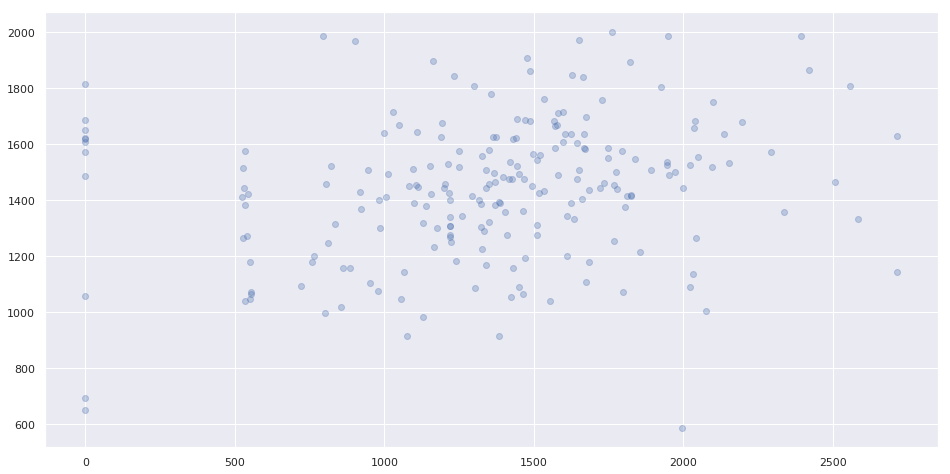

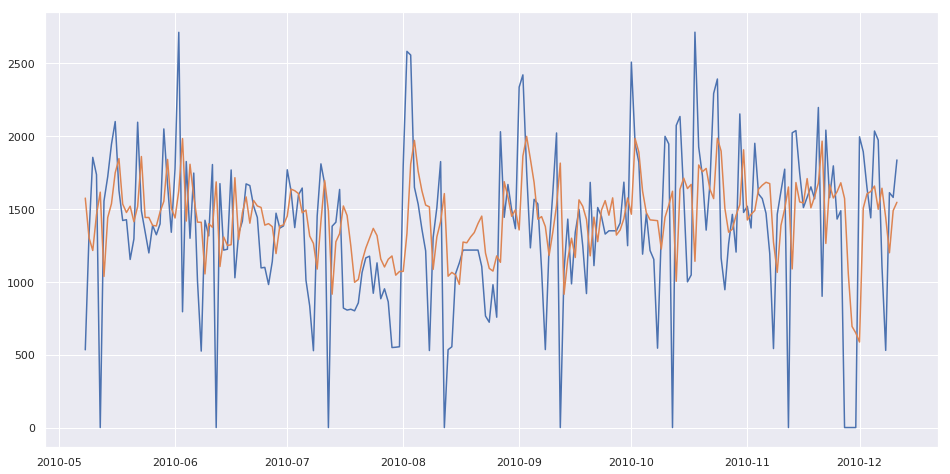

<Figure size 1152x720 with 0 Axes>

In [17]:
# plot the results
sns.set(rc={"figure.figsize": (16, 8)})
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.figure(figsize=(16,10))
plt.show()

In [ ]:
# save the model to a file
joblib.dump(model, 'model.joblib') 

In [ ]:
# save the column names
joblib.dump(X_columns, 'X_columns.joblib')

In [ ]:
import pickle

# save the model to file
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from file
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.predict([[3,2685,3521,4215,1850,1987,2365,3122]])
print(result)